Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection 

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data analysis and preprocessing

In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the duplicated rows
duplicate_rows = car_dataset[car_dataset.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
15      Dealer       Manual      0  
17      Dealer       Manual      0  
51      Dealer    Automatic      0  
93      Dealer    Automatic      0  


In [8]:
car_dataset= car_dataset.drop_duplicates(keep='first',ignore_index=True )

In [9]:
duplicate_rows = car_dataset[car_dataset.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]
Index: []


In [10]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [11]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
car_dataset['Car_Name'].nunique()

98

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car_dataset['Car_Name']=le.fit_transform(car_dataset['Car_Name'])#replaces old col object values with encode col

<AxesSubplot:>

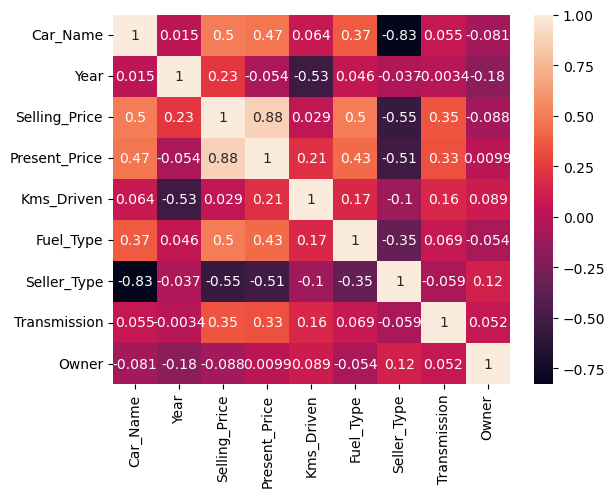

In [14]:
sns.heatmap(car_dataset.corr(),annot=True)

In [15]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,0,0,0,0
1,93,2013,4.75,9.54,43000,1,0,0,0
2,68,2017,7.25,9.85,6900,0,0,0,0
3,96,2011,2.85,4.15,5200,0,0,0,0
4,92,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [16]:
# X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
X= car_dataset.drop(['Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

Feature selection

In [17]:
car_dataset.corr()['Selling_Price']

Car_Name         0.501429
Year             0.234369
Selling_Price    1.000000
Present_Price    0.876378
Kms_Driven       0.028566
Fuel_Type        0.500292
Seller_Type     -0.553851
Transmission     0.348869
Owner           -0.087880
Name: Selling_Price, dtype: float64

In [18]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0,n_estimators=1000,max_features=4).fit(X,Y)
print( "Features importance in prediction")
for i, item in enumerate(model.feature_importances_):
 print("{0:s}:{1:.2f}".format(X.columns[i] ,item ))

Features importance in prediction
Car_Name:0.14
Year:0.07
Present_Price:0.59
Kms_Driven:0.05
Fuel_Type:0.06
Seller_Type:0.06
Transmission:0.04
Owner:0.00


In [19]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=100,max_features=4).fit(X,Y)
importances = list(model.feature_importances_) # Get numerical feature importances 
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)] # List of tuples with variable and importance 
# Sort the feature importances by most important first 
feature_importances = sorted(feature_importances, key = lambda X: X[1], reverse = True) 
print(feature_importances)# 

[('Present_Price', 0.53), ('Car_Name', 0.17), ('Fuel_Type', 0.08), ('Year', 0.07), ('Seller_Type', 0.06), ('Kms_Driven', 0.05), ('Transmission', 0.04), ('Owner', 0.0)]


In [20]:
# from the above we can see taht the Owner has the least correlation with the target column (Selling_Price) and it it the least import feature for the prediction of Selling_Price 
#so we conclude that teh column 'Owner' was not needed as feature for target prediction
# other columns like ('Year', 0.07), ('Fuel_Type', 0.06), ('Seller_Type', 0.05), ('Kms_Driven', 0.04), ('Transmission', 0.04) also has low value but the number of features is less so in this case we will keep them
#('Present_Price', 0.57) has the highest value so we will definately keep it.
del X['Owner']

In [21]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,90,2014,5.59,27000,0,0,0
1,93,2013,9.54,43000,1,0,0
2,68,2017,9.85,6900,0,0,0
3,96,2011,4.15,5200,0,0,0
4,92,2014,6.87,42450,1,0,0
...,...,...,...,...,...,...,...
294,69,2016,11.60,33988,1,0,0
295,66,2015,5.90,60000,0,0,0
296,69,2009,11.00,87934,0,0,0
297,69,2017,12.50,9000,1,0,0


Feature scaling - normalizating values using min max scaler

In [22]:
columns_names=X.columns
columns_names

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission'],
      dtype='object')

In [23]:
# we can see that each feature numeric range is different to scale all the features we are gonna use a scaler
# i used MinMaxScaler so that all the numeric values remain in the range of 0 to 1
#before that i have saved clumn names
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler() # values 0 to 1
X=scaler.fit_transform(X)

In [24]:
print(X)

[[0.92783505 0.73333333 0.0571088  ... 0.         0.         0.        ]
 [0.95876289 0.66666667 0.09991331 ... 0.5        0.         0.        ]
 [0.70103093 0.93333333 0.10327265 ... 0.         0.         0.        ]
 ...
 [0.71134021 0.4        0.11573472 ... 0.         0.         0.        ]
 [0.71134021 0.93333333 0.1319896  ... 0.5        0.         0.        ]
 [0.68041237 0.86666667 0.06046814 ... 0.         0.         0.        ]]


In [25]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
294     9.50
295     4.00
296     3.35
297    11.50
298     5.30
Name: Selling_Price, Length: 299, dtype: float64


Splitting Training and Test data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Anytime we are evaluating model performance repeatedly we need to create training, validation, and testing datasets.

Model training & evaluation

-> Holdout method = train test spliting

-> cross validation method  train test & validation splitting

-> grid search = hyperparameter tunning

In [27]:
# pip install xgboost

In [28]:
# importing the models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.naive_bayes import GaussianNB #for non -ve values only
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost.sklearn import XGBRegressor 
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
def create_regression_models():
    models = {
        "LR":LinearRegression(),
        "Ridge":Ridge(),
        "Lasso":Lasso(),
        "GBR":GradientBoostingRegressor(),
        "XGB":XGBRegressor(),
        "BR":BayesianRidge(),
#         "GNB":GaussianNB(),
#         "MNB":MultinomialNB(), 
        "SVR":SVR(),
        "DTR":DecisionTreeRegressor(random_state = 0), 
        "RFR":RandomForestRegressor(random_state=0), 
        "KNR":KNeighborsRegressor()
    }
    return models
from sklearn.metrics import mean_squared_error, make_scorer,r2_score
mse_scorer=make_scorer(mean_squared_error) 
r2_scorer=make_scorer(r2_score) 
# metrics.r2_score(Y_test, test_data_prediction)

-Linear Regression: It is a simple and widely used algorithm that assumes a linear relationship between the features and the target variable (car price). It can provide quickand interpretable results.

-Decision Trees:Decision trees can be used for both regression and classification tasks.They recursively split the data based on the features to create a tree-like model. Decisiontrees can capture complex relationships and are relatively easy to understand.

-Random Forest: Random Forest is an ensemble learning method that combines multipledecision trees. It can provide more accurate predictions compared to a single decision treeand helps reduce overfitting.

-Gradient Boosting:Gradient Boosting algorithms like XGBoost or LightGBM are powerfultechniques that sequentially build an ensemble of weak learners (decision trees) byfocusing on the mistakes made by the previous learners. They are known for their highaccuracy and ability to handle complex datasets.

-Support Vector Machines (SVM): SVM is a supervised learning algorithm that finds anoptimal hyperplane to separate data points into different classes. In the case of car priceprediction, SVM can be used for regression by mapping the features to a higher-dimensional space.

-Neural Networks:Deep learning techniques like artificial neural networks (ANN) can beused for car price prediction. They can capture complex relationships between featuresand target variables, but they may require more data and computational resources.

-Bayesian Regression:Bayesian regression techniques, such as Gaussian processes orBayesian linear regression, can provide uncertainty estimates along with predictions. Theyare useful when uncertainty quantification is important.

-K-Nearest Neighbors (KNN): KNN is a simple instance-based learning algorithm thatpredicts the value of a new data point based on the k nearest training samples. It can beeffective if there are local patterns in the data.

a) train test spliting data then testing models

In [29]:
def compare_models(x,y):
    
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0 ) #20% will be test 
  models_dictionary=create_regression_models()
  model_name_list=[]  
  accuracy_scores_list=[]
  result=[]  
  for model_name, model in models_dictionary.items():
        
        m1=model.fit(X_train, Y_train)
        ypred= m1.predict(X_test)
        s1=m1.score(X_test,Y_test)
        s2=m1.score(X_train,Y_train)
        print("Model",m1)
        regression_models_evaluation(Y_test,ypred)
        print("score: ",s1)# r^2 score = error score
        result.append({
        'Name': model_name,    
        'Model used' : model,
        'Testing Accuracy score' : s1,
        'Training Accuracy score' :s2  
        })
        model_name_list.append(model_name)
        accuracy_scores_list.append(s1)
        actual_vs_predicted(Y_test,ypred)
        print()
        print('---------------------------------------------------------------')
        print()
#   accuracy_scores_lst=[dict["accuracy score"] for dict in result ]
#   print(accuracy_scores_lst)
#   plotting_accuracy_score_Comparation(model_name_list ,accuracy_scores_list)
  result_dataframe = pd.DataFrame(result, columns = ['Name','Model used','Testing Accuracy score','Training Accuracy score'])
  best_model_index = result_dataframe['Testing Accuracy score'].idxmax()
  best_model = result_dataframe.loc[best_model_index, 'Model used']
  print("Best Model:", best_model)
  print("""because of:
a) Testing R2 score {}
b) Training R2 score {}""".format(result_dataframe.loc[best_model_index, 'Testing Accuracy score'],result_dataframe.loc[best_model_index, 'Training Accuracy score'] ))
  print("we can see that {} has the best training and testing accuracy also their differnece is not much".format(best_model))
# print("Model with highest prediction score for test dataset is:\n",result_dataframe[result_dataframe['Testing Accuracy score']==result_dataframe['Testing Accuracy score'].max()])
  return result_dataframe
        
def regression_models_evaluation (ytest,ypred):
  from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
  mae= mean_absolute_error (ytest,ypred)# mean or average of all the errors
  mse= mean_squared_error (ytest,ypred) #better tahn mse as focus is more on large error due to square term and penelizes teh model for erors better but unit is also squared
  rmse= mean_squared_error (ytest,ypred, squared=False)# better than mse as RMSE penalizes the model more effectively than “MAE” when it makes bad predictions and has the same unit of the target.
  #rae= #mean values of target and takes total absolute error and normalizes it
  r2 = r2_score(ytest,ypred) #defines how much variation in the response does the model explain
  print("MSE = ",mse)
  print("MAE = ",mae)
  print("RMSE = ",rmse)
  print("R^2 = ",r2)

def plotting_accuracy_score_Comparation(models_names,accuracy_scores): 
    sns.set()
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(models_names,accuracy_scores,color=['#102963','#5a2be2','#9966cc','#df73ff','#702763','#502763','#4023','#E6E6FA'],label=accuracy_scores);
    for i in ax.patches:
        ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
    plt.title('Comparison of Different Classification Models');
    plt.ylabel('Accuracy');
    plt.xlabel('Regression Models');
    plt.show();
    print()
    
def actual_vs_predicted(ytest,ypred):
    plt.scatter(ytest,ypred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(" Actual Prices vs Predicted Prices")
    plt.show()

Model LinearRegression()
MSE =  4.475713911678342
MAE =  1.283328225331864
RMSE =  2.1155883133725104
R^2 =  0.7441259240782854
score:  0.7441259240782854


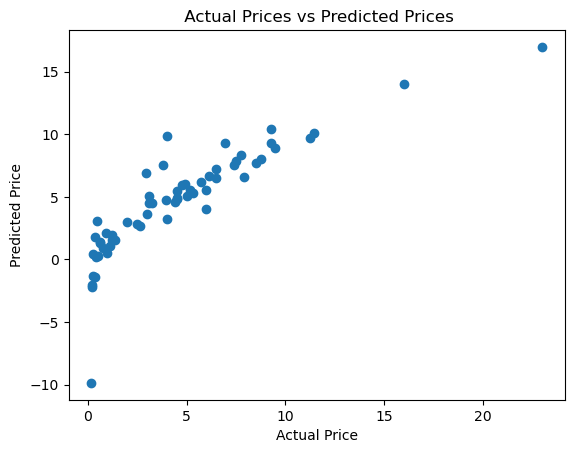


---------------------------------------------------------------

Model Ridge()
MSE =  4.322795149294447
MAE =  1.5058821269595455
RMSE =  2.0791332687671678
R^2 =  0.7528682047039474
score:  0.7528682047039474


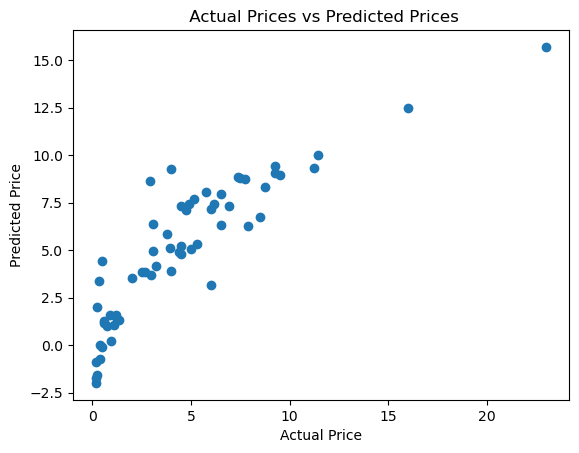


---------------------------------------------------------------

Model Lasso()
MSE =  14.62713769836054
MAE =  2.725249134199134
RMSE =  3.824544116409241
R^2 =  0.1637746701856987
score:  0.1637746701856987


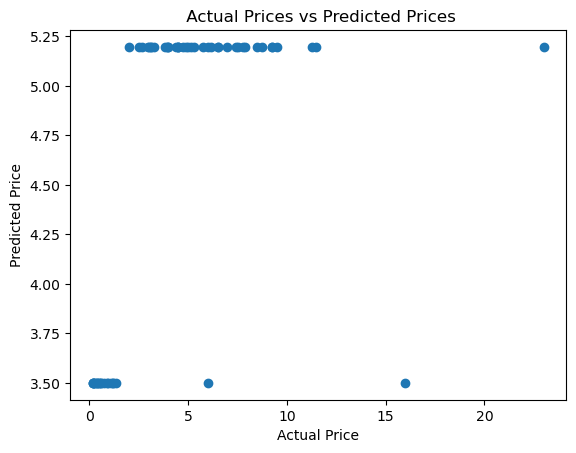


---------------------------------------------------------------

Model GradientBoostingRegressor()
MSE =  0.511265716764807
MAE =  0.5009249286590873
RMSE =  0.7150284726951837
R^2 =  0.9707712232262423
score:  0.9707712232262423


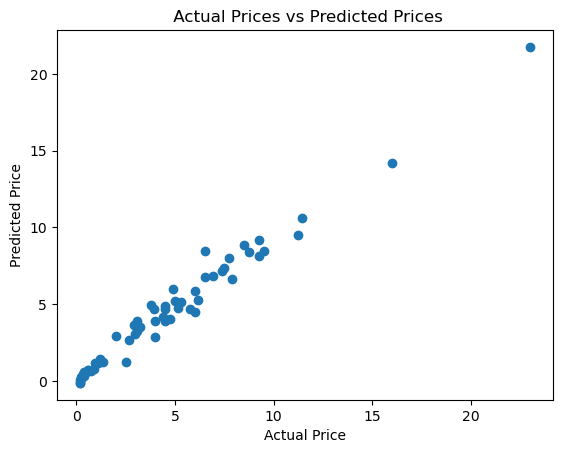


---------------------------------------------------------------

Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
MSE =  0.523526024039539
MAE =  0.4684850317289433
RMSE =  0.7235509823361025
R^2 =  0.9700703082758357
score:  0.9700703082758357


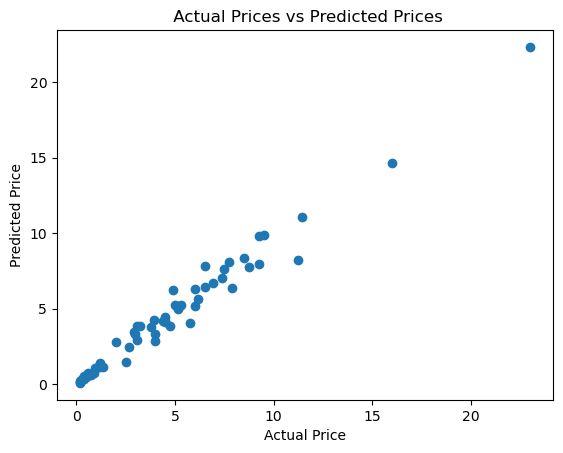


---------------------------------------------------------------

Model BayesianRidge()
MSE =  4.3646761955156474
MAE =  1.284010172807364
RMSE =  2.0891807474499777
R^2 =  0.7504738885765196
score:  0.7504738885765196


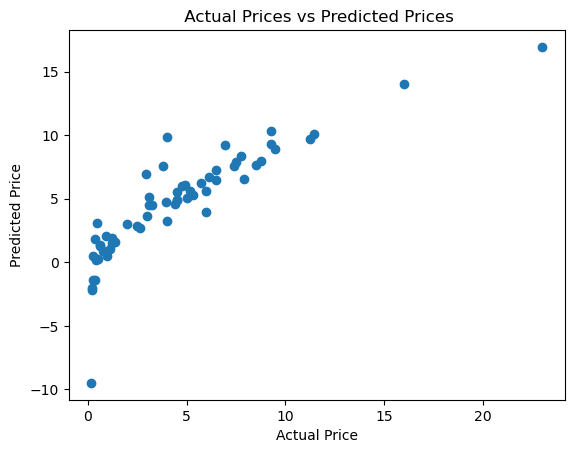


---------------------------------------------------------------

Model SVR()
MSE =  6.604362044441375
MAE =  1.3925554045297581
RMSE =  2.5698953372542968
R^2 =  0.6224322938147324
score:  0.6224322938147324


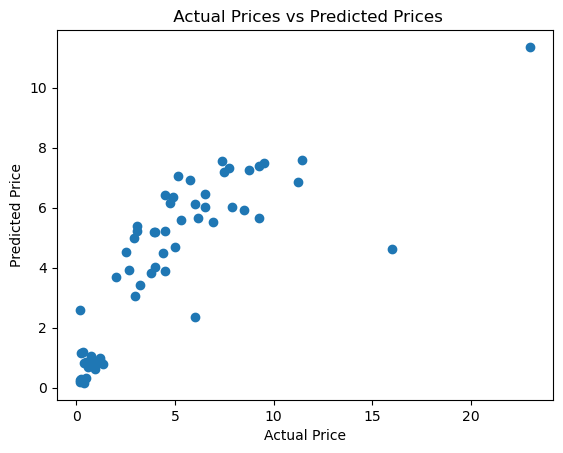


---------------------------------------------------------------

Model DecisionTreeRegressor(random_state=0)
MSE =  0.7858199999999997
MAE =  0.5773333333333334
RMSE =  0.8864648893216244
R^2 =  0.9550751075004698
score:  0.9550751075004698


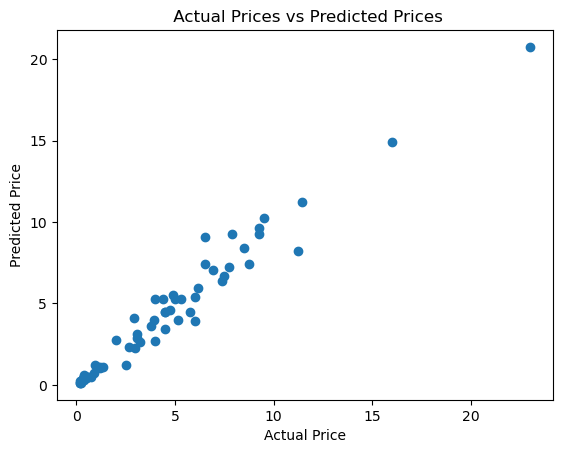


---------------------------------------------------------------

Model RandomForestRegressor(random_state=0)
MSE =  0.722123288833333
MAE =  0.530428333333333
RMSE =  0.8497783763036884
R^2 =  0.958716613063749
score:  0.958716613063749


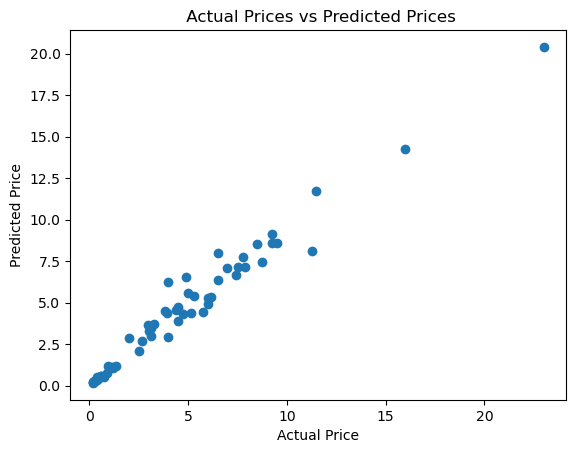


---------------------------------------------------------------

Model KNeighborsRegressor()
MSE =  4.8015808
MAE =  1.1205999999999998
RMSE =  2.1912509669136484
R^2 =  0.7254962952485191
score:  0.7254962952485191


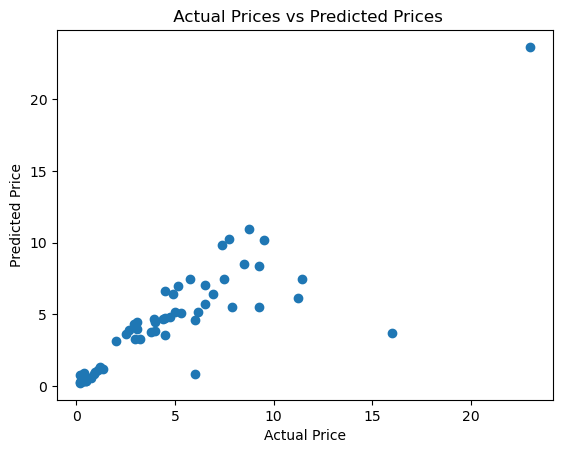


---------------------------------------------------------------

Best Model: GradientBoostingRegressor()
because of:
a) Testing R2 score 0.9707712232262423
b) Training R2 score 0.9967521517233363
we can see that GradientBoostingRegressor() has the best training and testing accuracy also their differnece is not much


,Name,Model used,Testing Accuracy score,Training Accuracy score
0,LR,LinearRegression(),0.744126,0.885958
1,Ridge,Ridge(),0.752868,0.820753
2,Lasso,Lasso(),0.163775,0.152502
3,GBR,([DecisionTreeRegressor(criterion='friedman_ms...,0.970771,0.996752
4,XGB,"XGBRegressor(base_score=None, booster=None, ca...",0.970070,0.999997
5,BR,BayesianRidge(),0.750474,0.885919
6,SVR,SVR(),0.622432,0.602305
7,DTR,DecisionTreeRegressor(random_state=0),0.955075,1.000000
8,RFR,"(DecisionTreeRegressor(max_features=1.0, rando...",0.958717,0.987892
9,KNR,KNeighborsRegressor(),0.725496,0.836970


In [30]:
compare_models(X,Y)

**MSE: **

MSE measures the average squared difference between the predicted and actual values. Lower values indicate better accuracy.

Advantages:
- Easy to calculate 
- Can be used with any model
- Provides an overall measure of how well the model is doing 

Disadvantages:
- Does not provide a measure of bias
- Does not provide insight into the direction of the errors (e.g. under- or over-estimation)

**RMSE:**

RMSE is the square root of the MSE and represents the average magnitude of the prediction errors. Like MSE, lower values indicate better accuracy.

Advantages:
- Provides an overall measure of how well the model is doing
- Provides an indication of the direction of the errors (e.g. under- or over-estimation)

Disadvantages:
- Can be sensitive to outliers

**MAE:**

MAE measures the average absolute difference between the predicted and actual values. It provides a measure of average prediction error and lower values indicate better accuracy.

Advantages:
- Easy to calculate 
- Provides an indication of the direction of the errors (e.g. under- or over-estimation)
- Less sensitive to outliers than RMSE

Disadvantages:
- Does not provide an overall measure of how well the model is doing

**R2:**

R-squared measures the proportion of the variance in the dependent variable that is explained by the regression model. Higher values (closer to 1) indicate better accuracy, but it should be interpreted in context with other metrics.

Advantages:
- Provides an overall measure of how well the model is doing
- Easy to interpret

Disadvantages:
- Does not provide an indication of the direction of the errors (e.g. under- or over-estimation)

Where to use each one:
- MSE: When you want to get an overall measure of how well the model is doing.  can be used for linear regression datasets.
- RMSE: When you want to get an overall measure of how well the model is doing and an indication of the direction of the errors.  can be used for linear regression datasets.
- MAE: When you want to get an indication of the direction of the errors and less sensitivity to outliers. can be used for non linear regression datasets.
- R2: When you want to get an overall measure of how well the model is doing and easy to interpret results. can be used for linear regression datasets.


b) comparing all regression models using cross validation method

In [31]:
import sklearn
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [32]:

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold,cross_val_score
#We then loop over these models, performing 5-fold cross-validation using cross_val_score and calculating the mean RMSE scores. 
#The negative mean squared error (neg_mean_squared_error) is used as the scoring metric.
# After evaluating all models, the model with the lowest mean RMSE score is selected as the best model based on the assumption that lower RMSE and higher R2 indicates better performance . 
#The best model is stored in the variable best_model.
def compare_models_cross_validation(X,y):
    models = list(create_regression_models().values())
    evaluation_metrics = []
    k_fold = KFold(n_splits=5, shuffle=True,random_state=0)  
    for model in models:
        rmse_scores = (-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))**0.5
        mean_rmse = rmse_scores.mean()

        mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
        mean_mae = (-mae_scores).mean()

        r2_scores = cross_val_score(model, X, y, cv=k_fold, scoring='r2') #
        mean_r2 = r2_scores.mean()

        evaluation_metrics.append({
            'Model': model,#type(model).__name__,
            'RMSE': mean_rmse,
            'MAE': mean_mae,
            'R-squared': mean_r2
        })

    df_evaluation = pd.DataFrame(evaluation_metrics)
#     print(df_evaluation)

    # Find the best model based on the lowest RMSE score
    best_model_index = df_evaluation['RMSE'].idxmin()
    best_model = df_evaluation.loc[best_model_index, 'Model']
    print("Best Model:", best_model)
#     print("i ",best_model_index)
    print("""because of:
a) highest R^2 score of {}
b) lowest root mean squared error {}""".format(df_evaluation.loc[best_model_index, 'R-squared'],df_evaluation.loc[best_model_index, 'RMSE'] ))
    return df_evaluation


In [33]:
compare_models_cross_validation(X,Y)

Best Model: RandomForestRegressor(random_state=0)
because of:
a) highest R^2 score of 0.9175056173640599
b) lowest root mean squared error 1.3510155823184207


,Model,RMSE,MAE,R-squared
0,LinearRegression(),2.085373,1.461336,0.817056
1,Ridge(),2.477877,1.697923,0.766813
2,Lasso(),4.676030,3.451575,0.118928
3,GradientBoostingRegressor(),1.354967,0.835590,0.896422
4,"XGBRegressor(base_score=None, booster=None, ca...",1.351318,0.846133,0.895423
5,BayesianRidge(),2.079074,1.462078,0.819147
6,SVR(),2.980649,1.767438,0.573679
7,DecisionTreeRegressor(random_state=0),1.847583,1.141162,0.827562
8,RandomForestRegressor(random_state=0),1.351016,0.857655,0.917506
9,KNeighborsRegressor(),2.336097,1.397410,0.759736


To choose the best model from the df_evaluation DataFrame, you can consider one or more evaluation metrics and their corresponding values. The choice of the best model depends on the specific requirements and priorities of your problem. Here are a few common scenarios:

Lowest RMSE: If the goal is to minimize the root mean squared error (RMSE), you can choose the model with the lowest RMSE score. In this case, the best model would be the one with the smallest RMSE value in the df_evaluation['RMSE'] column.

Lowest MAE: If the mean absolute error (MAE) is more important for your problem, you can choose the model with the lowest MAE score. In this case, the best model would be the one with the smallest MAE value in the df_evaluation['MAE'] column.

Highest R²: If you prioritize the goodness of fit and want to maximize the R-squared (R²) value, you can choose the model with the highest R² score. In this case, the best model would be the one with the largest R² value in the df_evaluation['R-squared'] column.

Alternatively, you can also consider a combination of metrics by assigning different weights or importance to each metric and creating a composite score. For example, you might create a weighted average score based on RMSE, MAE, and R² and choose the model with the highest composite score.

The decision on the best model ultimately depends on your specific requirements, the nature of the problem, and the evaluation metrics that are most relevant in your context.


If the R-squared (R2) value in a regression analysis is negative, it means that the model performs worse than a simple horizontal line in explaining the variability in the dependent variable. This indicates that the model fails to capture any meaningful relationship between the independent variables and the dependent variable, and its predictions are even worse than using the mean of the dependent variable for all observations.

A negative R2 can be caused by factors like overfitting, inappropriate model specification, or errors/inconsistencies in the data. When encountering a negative R2 value, it is important to carefully examine the model's assumptions, data quality, and the appropriateness of the selected variables and functional form. The model may need to be revised or reevaluated as it is not suitable for the data.

hence in this case i am using RMSE and R2 for model evaulation

In [34]:
# list(create_regression_models().values())

c) comparing all regression models using gridsearch method

In [54]:

from sklearn.metrics import make_scorer, mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
def create_model_hyperparameters():
    model_hyperparameters = {
    

    'Ridge': {
        'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
        'alpha' : [1,10,50,100],
        'fit_intercept':[True, False]
#         'normalize':[True, False]
    },
    
    'Lasso': {
#         'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
        'alpha' : [1,10,50,100],#[0.0001, 0.001,0.01, 0.1, 1, 10]
        'fit_intercept':[True, False]
#         'normalize':[True, False]
    },

    'SVR': {
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'gamma': [0.01,0.1,1,10],
        'C' : [1,5,10,20]
    },


    'KNR' : {
        'n_neighbors' : [3,5,7,10,12],#, Number of neighbor points to consider for prediction
        'weights': ['uniform', 'distance'],  # weight function used in prediction
        'p': [1,2]   # p=1 compute manhattan distance, p=2 compute euclidean distance
    },
        
    'DTR' : {
        'max_depth': [7], #np.linspace(1, 10, 10) The maximum depth of the tree
        'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
        'min_samples_leaf': [3,4,5,6,7,8], #[3,4,5,6,7,8] The minimum number of samples required to be at a leaf node
        'min_samples_split': [0.1], #np.linspace(0.1, 1.0, 10) The minimum number of samples required to split an internal node
        'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'] #The function to measure the quality of a split    
    },

    'RFR' : {
        'n_estimators' : [10, 20, 50, 100], #number of trees in the forest
        'max_depth': [4,5,6,7,8,9],# maximumm length from beginning of the tree to the trees end nodes                
        'max_features': ['auto', 'sqrt'], 
        'min_samples_leaf': [2,3,4,5,6,7],          
        'min_samples_split' : [0.01]     
    },
    'GBR' : {
        'learning_rate': [0.01,0.02,0.03,0.04],
        'subsample'    : [0.9, 0.5, 0.2, 0.1],
        'n_estimators' : [100,500,1000, 1500],
        'max_depth'    : [4,6,8,10]    
    },
    'XGB': {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
        
    }
    return model_hyperparameters


def compare_models_gridSearch1(X,y):
# Define the models and parameter grids in a dictionary
#     model_params = {
#         LinearRegression(): {'normalize': [True, False]},
#         DecisionTreeRegressor(): {'max_depth': [None, 5, 10]},
#         RandomForestRegressor(): {'n_estimators': [100, 200, 500]}
#     }
    models_dictionary = create_regression_models() 
    hyperparameters_dictionary =create_model_hyperparameters()

    # Define the evaluation metrics
    scoring = {
        'RMSE': make_scorer(mean_squared_error, squared=False),
        'R-squared': make_scorer(r2_score)
    }
    
    # Perform GridSearchCV for each model
    best_models = []
    best_hyperparameters = []
    best_scores=[]
    best_results=[]
    for model_name in hyperparameters_dictionary.keys():
        
        model= models_dictionary[model_name]  
        params = hyperparameters_dictionary[model_name]
        grid_search = GridSearchCV(model, params, scoring=scoring, cv=5, refit='RMSE')
        grid_search.fit(X, y)
        best_models.append(grid_search.best_estimator_)
        best_hyperparameters.append(grid_search.best_params_)
        best_scores.append(grid_search.best_score_)
        best_results.append(grid_search.cv_results_)
        

    # Create a DataFrame to store the results
    evaluation_metrics = []

    for model, hyperparameters, score, result in zip(best_models, best_hyperparameters,best_scores,best_results):
        y_pred = model.predict(X)
        rmse = mean_squared_error(y, y_pred, squared=False)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        evaluation_metrics.append({
            'Model': type(model).__name__,
            'Best Hyperparameters': hyperparameters,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Best Score': score,
            'Best Result': result
        })

    df_evaluation = pd.DataFrame(evaluation_metrics)
#     print(df_evaluation)

    # Find the best model based on the highest R-squared score and lowest RMSE
    best_model_index = df_evaluation['R-squared'].idxmax()
    best_model = df_evaluation.loc[best_model_index, 'Model']
    best_hyperparams = df_evaluation.loc[best_model_index, 'Best Hyperparameters']
    best_scores = df_evaluation.loc[best_model_index, 'Best Score']
    best_results = df_evaluation.loc[best_model_index, 'Best Result']
    print('index ',best_model_index)
    print("Best Model:", best_model)
    print("Best Hyperparameters:", best_hyperparams)
    
    return df_evaluation


In [55]:
compare_models_gridSearch1(X,Y)

C:\Users\garim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\garim\a

C:\Users\garim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\garim\a

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\garim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

index  7
Best Model: XGBRegressor
Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}


,Model,Best Hyperparameters,RMSE,MAE,R-squared,Best Score,Best Result
0,Ridge,"{'alpha': 100, 'fit_intercept': True, 'solver'...",4.074478,2.576032,0.329497,4.089826,"{'mean_fit_time': [0.00516977310180664, 0.0030..."
1,Lasso,"{'alpha': 10, 'fit_intercept': False}",6.769364,4.589632,-0.850771,5.956511,"{'mean_fit_time': [0.0023012638092041017, 0.00..."
2,SVR,"{'C': 20, 'gamma': 10, 'kernel': 'sigmoid'}",106.875901,17.467111,-460.335274,54.443120,"{'mean_fit_time': [0.016391801834106445, 0.014..."
3,KNeighborsRegressor,"{'n_neighbors': 12, 'p': 2, 'weights': 'uniform'}",2.267961,1.036474,0.792256,2.474793,"{'mean_fit_time': [0.003972959518432617, 0.002..."
4,DecisionTreeRegressor,"{'criterion': 'poisson', 'max_depth': 7, 'max_...",2.151231,0.985983,0.813091,3.024256,"{'mean_fit_time': [0.01591486930847168, 0.0156..."
5,RandomForestRegressor,"{'max_depth': 4, 'max_features': 'sqrt', 'min_...",2.196599,1.184720,0.805124,2.499728,"{'mean_fit_time': [0.0630427360534668, 0.11575..."
6,GradientBoostingRegressor,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",2.624525,1.614629,0.721799,2.884161,"{'mean_fit_time': [0.27760815620422363, 0.2314..."
7,XGBRegressor,"{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_d...",0.411481,0.315150,0.993162,2.338437,"{'mean_fit_time': [0.11355733871459961, 0.1143..."


As can be seen from the table above, resulted to be the best model for this dataset because of:

highest R^2 score
lowest root mean squared error

Model Training

1. Linear Regression

In [38]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [39]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [40]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [41]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8759862285558309


Visualize the actual prices and Predicted prices

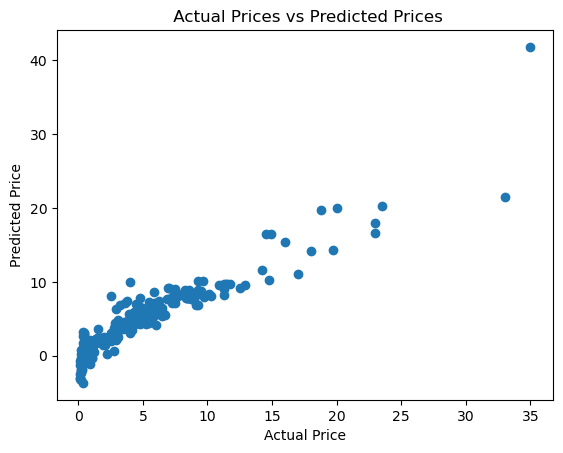

In [42]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [43]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [44]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8573664321171077


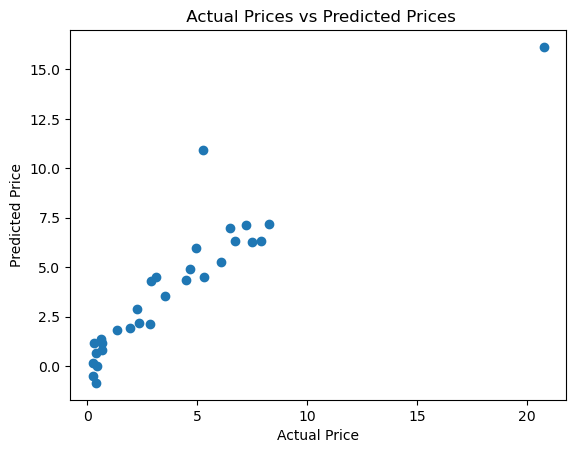

In [45]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [46]:
# loading the linear regression model
lass_reg_model = Lasso()

In [47]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [48]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [49]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.13438907890905083


Visualize the actual prices and Predicted prices

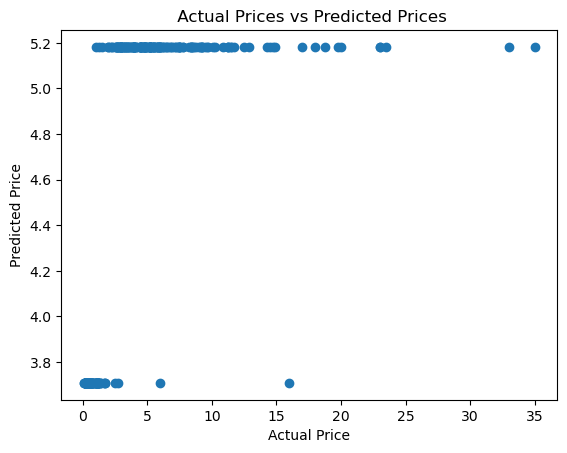

In [50]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [51]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [52]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.14756381207111102


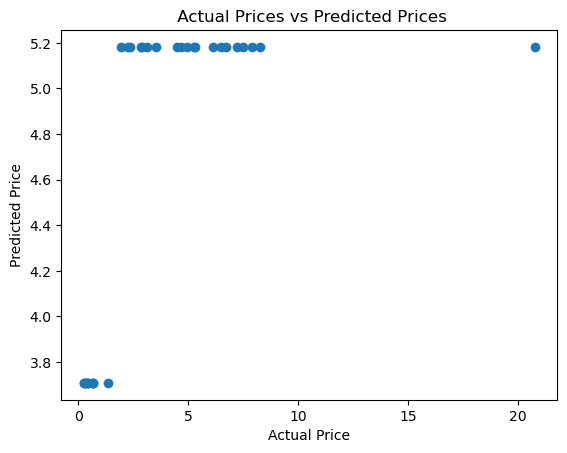

In [53]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()